# Binary classification

In [247]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
%matplotlib inline

In [144]:
N_SAMPLES = 1000
TEST_SIZE = 0.1

## 1. Create a dataset

In [263]:
X, y = make_circles(n_samples=N_SAMPLES, factor=.3, noise=.10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=42)

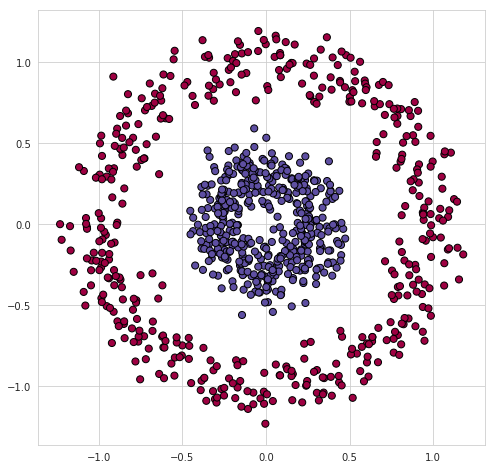

In [264]:
plt.figure(figsize=(8,8))
sns.set_style("whitegrid")
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train.ravel(), s=50, cmap=plt.cm.Spectral, edgecolors='black');

## 2.  Build model using Keras

In [293]:
model = Sequential()
model.add(Dense(5, input_dim=2,activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [294]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [295]:
model.fit(X_train, y_train, epochs=20, verbose=0)
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.22871859192848207
Test accuracy: 0.84


In [296]:
grid = np.mgrid[-1.5:1.5:100j,-1.5:1.5:100j]
grid_2d = grid.reshape(2, -1).T
X, Y = grid
prediction_probs = model.predict_classes(grid_2d, batch_size=32, verbose=0)

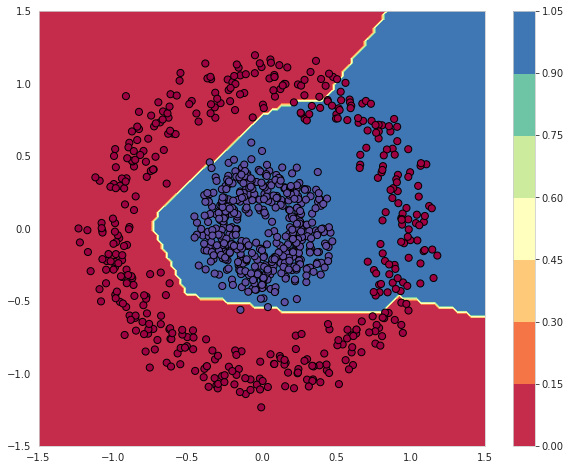

In [297]:
fig, ax = plt.subplots(figsize=(10, 8))
contour = ax.contourf(X, Y, prediction_probs.reshape(100, 100), cmap=cm.Spectral)
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train.ravel(), s=50, cmap=plt.cm.Spectral, edgecolors='black');
cbar = plt.colorbar(contour, ax=ax)